<a href="https://colab.research.google.com/github/anshupandey/Reinforcement-Learning/blob/main/Code_RL_product_trading_using_q_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget -q https://raw.githubusercontent.com/anshupandey/Reinforcement-Learning/main/datasets/Product_profit.csv
!wget -q https://raw.githubusercontent.com/anshupandey/Reinforcement-Learning/main/datasets/Customer_Product_Data.xlsx

In [3]:
#loading the data
df = pd.read_excel("Customer_Product_Data.xlsx")
df2 = pd.read_csv("Product_profit.csv",index_col = "Products")
df.head()

,Existing Products,Purchased Products
0,Health Insurance,Travel Credit Card
1,Travel Credit Card,Motor Vehicle Insurance
2,Motor Vehicle Insurance,Current Account
3,Motor Vehicle Insurance,Vehicle Loan
4,Travel Credit Card,Term Insurance


In [ ]:
df2.head()

,Profit
Products,
Health Insurance,100
Travel Credit Card,250
Term Insurance,80
Personal Loan,320
Vehicle Loan,120


In [4]:
data = np.array(df).tolist()
data

[['Health Insurance', 'Travel Credit Card'],
 ['Travel Credit Card', 'Motor Vehicle Insurance'],
 ['Motor Vehicle Insurance', 'Current Account'],
 ['Motor Vehicle Insurance', 'Vehicle Loan'],
 ['Travel Credit Card', 'Term Insurance'],
 ['Travel Credit Card', 'Personal Loan'],
 ['Home Loan', 'Mutual Fund Investment'],
 ['Term Insurance', 'Vehicle Loan'],
 ['Health Insurance', 'Current Account'],
 ['Current Account', 'Demat Account'],
 ['Shopping Credit Card', 'Home Loan'],
 ['Demat Account', 'Shopping Credit Card'],
 ['Travel Credit Card', 'Demat Account'],
 ['Personal Loan', 'Home Loan']]

In [5]:
reward = df2.to_dict()["Profit"]
reward

{'Health Insurance': 100,
 'Travel Credit Card': 250,
 'Term Insurance': 80,
 'Personal Loan': 320,
 'Vehicle Loan': 120,
 'Motor Vehicle Insurance': 85,
 'Current Account': 150,
 'Demat Account': 200,
 'Shopping Credit Card': 370,
 'Home Loan': 220,
 'Mutual Fund Investment': 400}

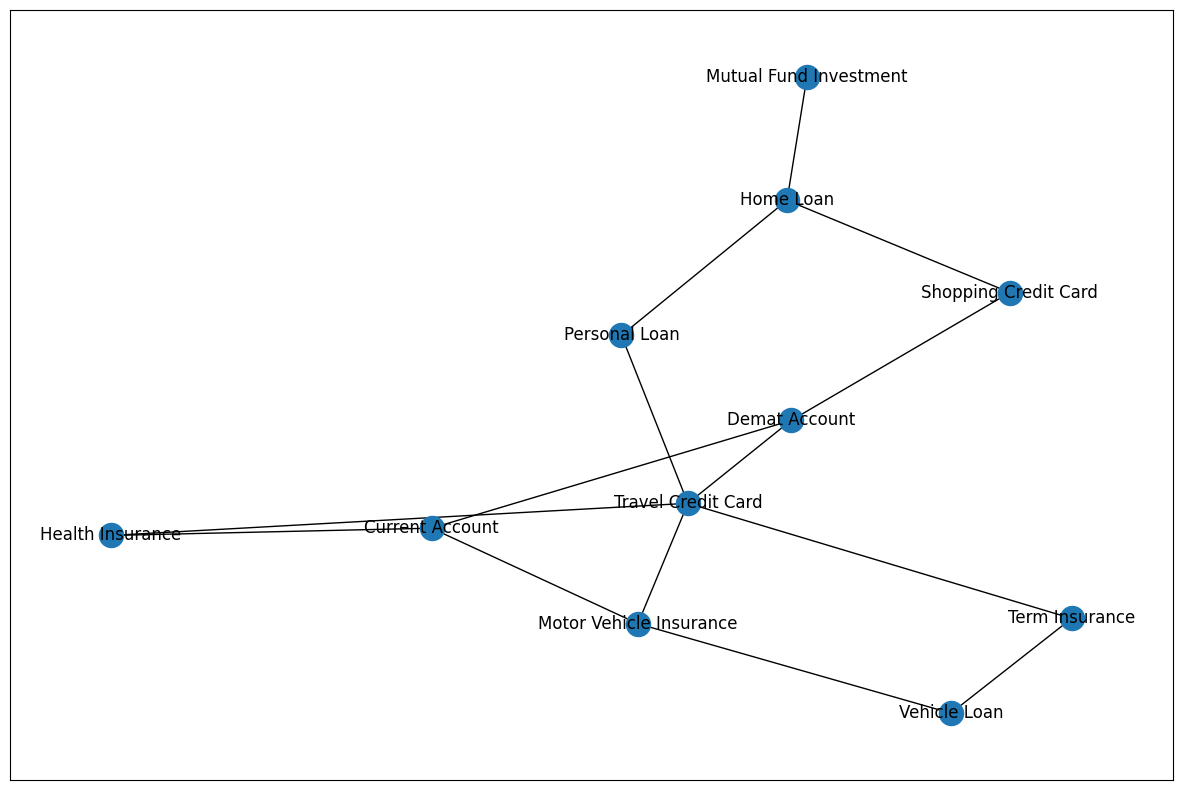

In [6]:
# Defining and visualising the graph
goal = "Mutual Fund Investment"
G = nx.Graph() # creating the graph object
G.add_edges_from(data) # creating edges using data of existing product to the next product
pos = nx.spring_layout(G)  # creating a layout
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos) # drawing the nodes
nx.draw_networkx_edges(G, pos) # drawing the edges
nx.draw_networkx_labels(G, pos) # labelling the nodes
plt.show()

In [7]:
dictionary = {"Health Insurance":0,"Travel Credit Card":1,"Term Insurance":2,"Personal Loan":3,"Vehicle Loan":4,"Motor Vehicle Insurance":5,
              "Current Account":6,"Demat Account":7,"Shopping Credit Card":8,"Home Loan":9,"Mutual Fund Investment":10}

In [8]:
data_encoded = [[dictionary[i] for i in k] for k in data]
reward_encoded = {}
for i in reward.keys():
  reward_encoded[dictionary[i]] = reward[i]
print(data_encoded)
print(reward_encoded)

[[0, 1], [1, 5], [5, 6], [5, 4], [1, 2], [1, 3], [9, 10], [2, 4], [0, 6], [6, 7], [8, 9], [7, 8], [1, 7], [3, 9]]
{0: 100, 1: 250, 2: 80, 3: 320, 4: 120, 5: 85, 6: 150, 7: 200, 8: 370, 9: 220, 10: 400}


In [9]:
# Defining the reward system for the bot
product_num = len(dictionary.keys())
M = np.matrix(np.ones(shape =(product_num, product_num)))
M *= -1
print(M)



[[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]]


In [11]:
for sale in data_encoded:
	M[sale[0],sale[1]] = reward_encoded[sale[1]]
	M[sale[1],sale[0]] = reward_encoded[sale[0]]

print(M)

[[ -1. 250.  -1.  -1.  -1.  -1. 150.  -1.  -1.  -1.  -1.]
 [100.  -1.  80. 320.  -1.  85.  -1. 200.  -1.  -1.  -1.]
 [ -1. 250.  -1.  -1. 120.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1. 250.  -1.  -1.  -1.  -1.  -1.  -1.  -1. 220.  -1.]
 [ -1.  -1.  80.  -1.  -1.  85.  -1.  -1.  -1.  -1.  -1.]
 [ -1. 250.  -1.  -1. 120.  -1. 150.  -1.  -1.  -1.  -1.]
 [100.  -1.  -1.  -1.  -1.  85.  -1. 200.  -1.  -1.  -1.]
 [ -1. 250.  -1.  -1.  -1.  -1. 150.  -1. 370.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1. 200.  -1. 220.  -1.]
 [ -1.  -1.  -1. 320.  -1.  -1.  -1.  -1. 370.  -1. 400.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. 220.  -1.]]


In [12]:
pd.DataFrame(M,columns=dictionary.keys(),index = dictionary.keys())

,Health Insurance,Travel Credit Card,Term Insurance,Personal Loan,Vehicle Loan,Motor Vehicle Insurance,Current Account,Demat Account,Shopping Credit Card,Home Loan,Mutual Fund Investment
Health Insurance,-1.0,250.0,-1.0,-1.0,-1.0,-1.0,150.0,-1.0,-1.0,-1.0,-1.0
Travel Credit Card,100.0,-1.0,80.0,320.0,-1.0,85.0,-1.0,200.0,-1.0,-1.0,-1.0
Term Insurance,-1.0,250.0,-1.0,-1.0,120.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
Personal Loan,-1.0,250.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,220.0,-1.0
Vehicle Loan,-1.0,-1.0,80.0,-1.0,-1.0,85.0,-1.0,-1.0,-1.0,-1.0,-1.0
Motor Vehicle Insurance,-1.0,250.0,-1.0,-1.0,120.0,-1.0,150.0,-1.0,-1.0,-1.0,-1.0
Current Account,100.0,-1.0,-1.0,-1.0,-1.0,85.0,-1.0,200.0,-1.0,-1.0,-1.0
Demat Account,-1.0,250.0,-1.0,-1.0,-1.0,-1.0,150.0,-1.0,370.0,-1.0,-1.0
Shopping Credit Card,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,200.0,-1.0,220.0,-1.0
Home Loan,-1.0,-1.0,-1.0,320.0,-1.0,-1.0,-1.0,-1.0,370.0,-1.0,400.0


In [13]:
# Defining some utility functions to be used in the training
Q = np.matrix(np.zeros([product_num, product_num])) # creating a q matrix with all values 0

gamma = 0.75
# learning parameter
initial_state = 1

# Determines the available actions for a given state
def available_actions(state):
	current_state_row = M[state, ]
	available_action = np.where(current_state_row >= 0)[1]
	return available_action

available_action = available_actions(initial_state)

# Chooses one of the available actions at random
def sample_next_action(available_actions_range):
	next_action = int(np.random.choice(available_action, 1))
	return next_action


action = sample_next_action(available_action)

def update(current_state, action, gamma):
	max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1]
	if max_index.shape[0] > 1:
		max_index = int(np.random.choice(max_index, size = 1))
	else:
		max_index = int(max_index)
	max_value = Q[action, max_index]
	Q[current_state, action] = M[current_state, action] + gamma * max_value # Bellman Equation to update the Q Matrix
	if (np.max(Q) > 0):
		return(np.sum(Q / np.max(Q)*100))
	else:
		return (0)
# Updates the Q-Matrix according to the path chosen

update(initial_state, action, gamma)


<ipython-input-13-1a011af0fa87>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_action, 1))
<ipython-input-13-1a011af0fa87>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size = 1))


100.0

In [14]:
available_actions(5)

array([1, 4, 6])

In [18]:
pd.DataFrame(Q,columns=dictionary.keys(),index = dictionary.keys())

,Health Insurance,Travel Credit Card,Term Insurance,Personal Loan,Vehicle Loan,Motor Vehicle Insurance,Current Account,Demat Account,Shopping Credit Card,Home Loan,Mutual Fund Investment
Health Insurance,0.000000,1158.570986,0.000000,0.000000,0.000000,0.000000,1009.551705,0.000000,0.000000,0.000000,0.000000
Travel Credit Card,968.922673,0.000000,948.922673,1211.427981,0.000000,953.823830,0.000000,1146.071179,0.000000,0.000000,0.000000
Term Insurance,0.000000,1158.563564,0.000000,0.000000,835.442005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Personal Loan,0.000000,1158.563564,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1188.570641,0.000000
Vehicle Loan,0.000000,0.000000,948.922673,0.000000,0.000000,953.922673,0.000000,0.000000,0.000000,0.000000,0.000000
Motor Vehicle Insurance,0.000000,1158.563564,0.000000,0.000000,835.442005,0.000000,1009.551705,0.000000,0.000000,0.000000,0.000000
Current Account,968.922673,0.000000,0.000000,0.000000,0.000000,953.922673,0.000000,1146.068940,0.000000,0.000000,0.000000
Demat Account,0.000000,1158.563564,0.000000,0.000000,0.000000,0.000000,1009.551705,0.000000,1261.428239,0.000000,0.000000
Shopping Credit Card,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1146.068940,0.000000,1188.571179,0.000000
Home Loan,0.000000,0.000000,0.000000,1211.427981,0.000000,0.000000,0.000000,0.000000,1261.427981,0.000000,1291.428385


<ipython-input-13-1a011af0fa87>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_action, 1))
<ipython-input-13-1a011af0fa87>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size = 1))
<ipython-input-13-1a011af0fa87>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(max_index)


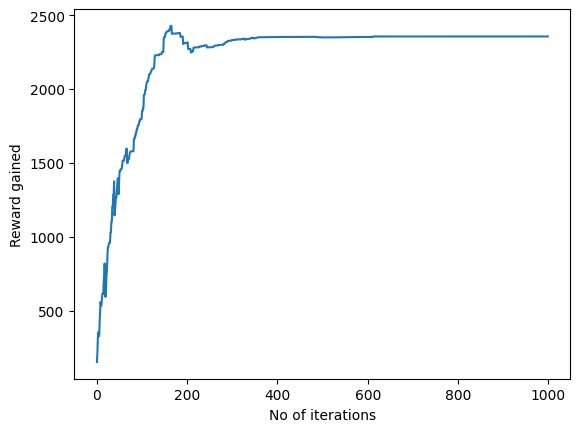

In [15]:
# Training and evaluating the bot using the Q-Matrix
scores = []
for i in range(1000):
	current_state = np.random.randint(0, int(Q.shape[0]))
	available_action = available_actions(current_state)
	action = sample_next_action(available_action)
	score = update(current_state, action, gamma)
	scores.append(score)

# print("Trained Q matrix:")
# print(Q / np.max(Q)*100)
# You can uncomment the above two lines to view the trained Q matrix

plt.plot(scores)
plt.xlabel('No of iterations')
plt.ylabel('Reward gained')
plt.show()


In [20]:
pd.DataFrame(Q,columns=dictionary.keys(),index = dictionary.keys())

,Health Insurance,Travel Credit Card,Term Insurance,Personal Loan,Vehicle Loan,Motor Vehicle Insurance,Current Account,Demat Account,Shopping Credit Card,Home Loan,Mutual Fund Investment
Health Insurance,0.000000,1158.570986,0.000000,0.000000,0.000000,0.000000,1009.551705,0.000000,0.000000,0.000000,0.000000
Travel Credit Card,968.922673,0.000000,948.922673,1211.427981,0.000000,953.823830,0.000000,1146.071179,0.000000,0.000000,0.000000
Term Insurance,0.000000,1158.563564,0.000000,0.000000,835.442005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Personal Loan,0.000000,1158.563564,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1188.570641,0.000000
Vehicle Loan,0.000000,0.000000,948.922673,0.000000,0.000000,953.922673,0.000000,0.000000,0.000000,0.000000,0.000000
Motor Vehicle Insurance,0.000000,1158.563564,0.000000,0.000000,835.442005,0.000000,1009.551705,0.000000,0.000000,0.000000,0.000000
Current Account,968.922673,0.000000,0.000000,0.000000,0.000000,953.922673,0.000000,1146.068940,0.000000,0.000000,0.000000
Demat Account,0.000000,1158.563564,0.000000,0.000000,0.000000,0.000000,1009.551705,0.000000,1261.428239,0.000000,0.000000
Shopping Credit Card,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1146.068940,0.000000,1188.571179,0.000000
Home Loan,0.000000,0.000000,0.000000,1211.427981,0.000000,0.000000,0.000000,0.000000,1261.427981,0.000000,1291.428385


In [16]:
# Testing
# Product Recommendation
dictionary2 = {v: k for k, v in dictionary.items()}
def recommend(current_product,goal_product):
  """
  Enter the current_product and goal_product from below:
  ['Health Insurance', 'Travel Credit Card', 'Term Insurance', 'Personal Loan', 'Vehicle Loan', 'Motor Vehicle Insurance', 'Current Account', 'Demat Account', 'Shopping Credit Card', 'Home Loan', 'Mutual Fund Investment']
  """
  current_product,goal_product = dictionary[current_product], dictionary[goal_product]
  steps = [current_product]
  while current_product != goal_product:
    next_step_index = np.where(Q[current_product, ] == np.max(Q[current_product, ]))[1]
    if next_step_index.shape[0] > 1:
      next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
      next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_product = next_step_index
  steps = [dictionary2[i] for i in steps]
  return steps

sale_strategy = recommend(current_product="Term Insurance",goal_product='Mutual Fund Investment')
print("Most efficient path:")
print(sale_strategy)


Most efficient path:
['Term Insurance', 'Travel Credit Card', 'Personal Loan', 'Home Loan', 'Mutual Fund Investment']


<ipython-input-16-ee6bf95cec29>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_step_index = int(next_step_index)
